In [1]:
import time
import numpy as np
from numpy import *
import matplotlib.pylab as plt
import operator
import pyscf
from pyscf import gto, scf, dft, tddft, data


elements = ['H' , 'He', 'Li', 'Be', 'B' , 'C' , 'N' , 'O' , 'F' , 'Ne',
    'Na', 'Mg', 'Al', 'Si', 'P' , 'S' , 'Cl', 'Ar', 'K' , 'Ca',
    'Sc', 'Ti', 'V' , 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn',
    'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y' , 'Zr',
    'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn',
    'Sb', 'Te', 'I' , 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd',
    'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb',
    'Lu', 'Hf', 'Ta', 'W' , 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg',
    'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th',
    'Pa', 'U' , 'Np', 'Pu'] 
hardness = [
0.47259288,
0.92203391,
0.17452888,
0.25700733,
0.33949086,
0.42195412,
0.50438193,
0.58691863,
0.66931351,
0.75191607,
0.17964105,
0.22157276,
0.26348578,
0.30539645,
0.34734014,
0.38924725,
0.43115670,
0.47308269,
0.17105469,
0.20276244,
0.21007322,
0.21739647,
0.22471039,
0.23201501,
0.23933969,
0.24665638,
0.25398255,
0.26128863,
0.26859476,
0.27592565,
0.30762999,
0.33931580,
0.37235985,
0.40273549,
0.43445776,
0.46611708,
0.15585079,
0.18649324,
0.19356210,
0.20063311,
0.20770522,
0.21477254,
0.22184614,
0.22891872,
0.23598621,
0.24305612,
0.25013018,
0.25719937,
0.28784780,
0.31848673,
0.34912431,
0.37976593,
0.41040808,
0.44105777,
0.05019332,
0.06762570,
0.08504445,
0.10247736,
0.11991105,
0.13732772,
0.15476297,
0.17218265,
0.18961288,
0.20704760,
0.22446752,
0.24189645,
0.25932503,
0.27676094,
0.29418231,
0.31159587,
0.32902274,
0.34592298,
0.36388048,
0.38130586,
0.39877476,
0.41614298,
0.43364510,
0.45104014,
0.46848986,
0.48584550,
0.12526730,
0.14268677,
0.16011615,
0.17755889,
0.19497557,
0.21240778,
0.07263525,
0.09422158,
0.09920295,
0.10418621,
0.14235633,
0.16394294,
0.18551941,
0.22370139]
HARDNESS = dict(zip(elements,hardness))

In [2]:
mol = gto.Mole()
mol.build(atom = 'C         -4.89126        3.29770        0.00029;\
O         -3.49307        3.28429       -0.00328;\
H         -5.28213        2.58374        0.75736;\
H         -5.28213        3.05494       -1.01161;\
H         -5.23998        4.31540        0.27138;\
H         -3.22959        2.35981       -0.24953', basis = 'def2-SVP', symmetry = True)

In [3]:
mf = dft.RKS(mol) #mf is ground density?
mf.xc = 'b3lyp'
mf.kernel()  #single point energy

converged SCF energy = -115.563857146133


-115.56385714613305

In [4]:
td = tddft.TDA(mf)
start = time.time()
td.kernel()    #compute first few excited states.
end = time.time()
print ('Pyscf time =', round(end-start,4))

Excited State energies (eV)
[6.96889373 8.53566816 8.83822488]
Pyscf time = 1.9581


In [5]:
#print (mol.atom_pure_symbol(0))
#to return pure element symbol only, no special characters


In [6]:
AO = [int(i.split(' ',1)[0]) for i in mol.ao_labels()] 
# .split(' ',1) is to split each element by space, split once.
# mol.ao_labels() it is a list of all AOs and corresponding atom_id, AO is a list of atom_id
#[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]


N_bf = len(AO)
#print (AO) 

In [7]:
mf.analyze()
##MO energies
Natm = mol.natm #number of atoms
MOe = mf.mo_energy #an array of MO energies


occupied = len(np.where(mf.mo_occ==2)[0])
#mf.mo_occ is an array of occupance [2,2,2,2,2,0,0,0,0.....]
virtual = N_bf - occupied
print (occupied, virtual, N_bf)


**** MO energy ****
MO #1   energy= -19.1200324123506  occ= 2
MO #2   energy= -10.2252892508138  occ= 2
MO #3   energy= -0.996544273142557 occ= 2
MO #4   energy= -0.660100764764333 occ= 2
MO #5   energy= -0.496015099528159 occ= 2
MO #6   energy= -0.436583016160302 occ= 2
MO #7   energy= -0.419080869175707 occ= 2
MO #8   energy= -0.322613679629768 occ= 2
MO #9   energy= -0.260987023013519 occ= 2
MO #10  energy= 0.0491987569097194 occ= 0
MO #11  energy= 0.0955676579759379 occ= 0
MO #12  energy= 0.136354007772245  occ= 0
MO #13  energy= 0.137422148427963  occ= 0
MO #14  energy= 0.199507012847126  occ= 0
MO #15  energy= 0.456676295338883  occ= 0
MO #16  energy= 0.474166717305126  occ= 0
MO #17  energy= 0.482367706435018  occ= 0
MO #18  energy= 0.576508839274188  occ= 0
MO #19  energy= 0.640994230104463  occ= 0
MO #20  energy= 0.650993561200111  occ= 0
MO #21  energy= 0.665496401138703  occ= 0
MO #22  energy= 0.706068427674609  occ= 0
MO #23  energy= 0.952204686143727  occ= 0
MO #24  energy

In [8]:
#mf.mulliken_pop_meta_lowdin_ao()
#population analysis

In [9]:
#nocc = mol.nelectron 
# mol.nelectron is number of electrons, not necessary the number of MOs

#C = pyscf.lo.orth.orth_ao(mol, method = 'lowdin')

C = mf.mo_coeff 
# mf.mo_coeff is the coefficient matrix


S = np.dot(np.linalg.inv(C.T), np.linalg.inv(C))

#S = mf.get_ovlp() #.get_ovlp()  is not basis overlap matrix

# print (np.linalg.norm(S1-S2))

s,ket = np.linalg.eig(S)
#s are eigenvalues, must be all positive
#each column of ket is a eigenket
#print (s)
s = s**0.5
X = np.linalg.multi_dot([ket,np.diag(s),ket.T])
#X == S^1/2

C = np.dot(X,C)
# #now C is orthogonzalized
# print (np.round(C,2))


In [10]:
def generateQ (atom_id):
    q = np.zeros([N_bf, N_bf])
    #q is same size with C
    for i in range (0, N_bf):
        for p in range (0, N_bf):
            #for a certain element q[i,p]
            #first two loops is to iterate all ith and pth column of C
            for mu in AO: 
                # the last loop is to sum up all C_mui*C_mup, calculate element q[i,p]
                if mu == atom_id:
                    q[i,p] += C[mu,i]*C[mu,p]
    return q

Qmatrix = [(generateQ(atom_id)) for atom_id in range (0, Natm)]
#a list of q matrix

# plt.matshow(q_atom_0)
# plt.show()

#print (np.round(q_atom_0.diagonal(),2))
#print (np.round(q_atom_0,2))



In [11]:
a_x = 0.25

beta1=0.2
beta2=1.83

alpha1=1.42
alpha2=0.48

beta = beta1 + beta2 * a_x
alpha = alpha1 + alpha2 * a_x

print (beta, alpha)

0.6575 1.54


In [37]:
#function to return distance between two atoms
R = pyscf.gto.mole.inter_distance(mol, coords=None) #Inter-particle distance array
#   distance = R [atom_A_id, atom_B_id]
#     a = mol.atom_coord(atom_A_id) #coordinates of atom A
#     b = mol.atom_coord(atom_B_id) #coordinates of atom B
#     distance = np.linalg.norm (a - b)
    
#(mol.atom_coord(atom_id)) is to return the coordinates of a certain atom, it is a ndarray

In [13]:
#function to return chemical hardness from dictionary HARDNESS
def Hardness (atom_id):
    atom = mol.atom_pure_symbol(atom_id) 
    #the symbol of atom looked at
    return HARDNESS[atom]
# print (Hardness (1))
# print (Hardness (0))

In [14]:
def eta (atom_A_id, atom_B_id):
    eta = (Hardness(atom_A_id) + Hardness(atom_B_id))/2
    return eta
#eta(0,1)

In [15]:
def gammaJ(atom_A_id, atom_B_id):
    gamma_A_B_J = (1/(R[atom_A_id, atom_B_id]**beta + (a_x*eta(atom_A_id, atom_B_id))**(-beta)))**(1/beta)
    return gamma_A_B_J
#gammaJ (2,1)

In [16]:
def gammaK(atom_A_id, atom_B_id):
    gamma_A_B_K = (1/(R[atom_A_id, atom_B_id]**alpha \
                   + eta(atom_A_id, atom_B_id)**(-alpha)))\
                    **(1/alpha)
    return gamma_A_B_K
#gammaK (2,1)

In [17]:
#define two electron intergeral (pq|rs)
def ele_int (p,q,r,s):
    pqrs = 0
    if q <= occupied:
        for atom_A_id in range (0, Natm):
            for atom_B_id in range (0, Natm):
                pqrs += Qmatrix[atom_A_id][p,q] * Qmatrix[atom_B_id][r,s] * gammaJ(atom_A_id, atom_B_id)
                #(ij|ab)
    else:
        for atom_A_id in range (0, Natm):
            for atom_B_id in range (0, Natm):
                pqrs += Qmatrix[atom_A_id][p,q] * Qmatrix[atom_B_id][r,s] * gammaK(atom_A_id, atom_B_id)
                #(ia|jb)
    return pqrs

0.0003969393899576694

In [18]:
def delta (a, b):
    if a == b:
        return 1
    else:
        return 0
delta(4,2)

0

In [19]:
A = np.zeros ([occupied*virtual, occupied*virtual])
np.shape(A)

(351, 351)

In [20]:
#build A matrix
m = -1
for i in range (0, occupied):
    for a in range (occupied, N_bf):
        m += 1 
        #for each occupied-virtial orbital combination, it corresponds to a certain row
        n = -1
        for j in range (0, occupied):
            for b in range (occupied, N_bf):
                n +=1
            #for each occupied-virtial orbital combination, it corresponds to a certain column
                A[m,n] = delta(i,j) * delta(a,b) * (MOe[a] - MOe[i]) \
                            + 2 * ele_int(i,a,j,b) - ele_int(i,j,a,b)
print (m,n)

350 350


In [64]:
#check whether A is symmetric
def check_symmetric(a, tol=1e-8):
    return np.all(np.abs(a-a.T) < tol)
print (check_symmetric(A, tol=1e-8))

False


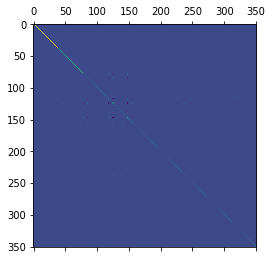

In [65]:
plt.matshow(A)
plt.show()

In [66]:
eigv,eigk = np.linalg.eigh(A)
#eigh guarantees you that the eigenvalues are sorted and uses a faster algorithm 
#that takes advantage of the fact that the matrix is symmetric. 

In [67]:
print (eigv[:5]*27.21138624598853)
# ':n', first n elements; 'n:' all elements except firt n 

[-1.86685485e-05 -2.02331785e-06 -5.04449954e-07  3.32621239e-07
  1.09018355e-06]


size of A_TDA is 351


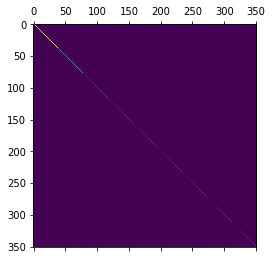

In [68]:
#this block is to reprocude the TDA A matrix
vind, hdiag = td.gen_vind(mf)
n = len(hdiag)
print ('size of A_TDA is', n)
A_TDA = np.zeros((n,n))
I = np.eye(n)
for i in range (0,n):
    A_TDA[:,i] = vind (I[:,i])

plt.matshow(A_TDA)
plt.show() #visualize the matrix

# the true A matrix in TAD

In [56]:
a,b = np.linalg.eigh(A_TDA) 
# to ensure A_TDA is the A matrix in TDA, eigenvalues are same with results solved by build-in methods

In [57]:
print (a[:5]*27.21138624598853)

[6.96889379 8.53566823 8.83822495 9.56991212 9.7916805 ]


In [58]:
# Excited State energies (eV)
# [6.96889373 8.53566816 8.83822488]